In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [32]:
plt.rcParams['figure.figsize'] = [16.18033, 10]

dataset = {"old":("1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "), 40),
            "new":("1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "), 80),
            "test":(['t089', 't120', 't251', 'top7', '1ubq', 't0766', 't0778', 't0782',
                       't0792', 't0803', 't0815', 't0833', 't0842', 't0844'], 40)}
# pdb_list, steps = dataset["old"]


def get_data(pre, pdb_list, simType="all_simulations", n_rum=30, formatName=True):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        if formatName:
            name = p.lower()[:4]
        else:
            name = p
        for i in range(n_rum):
            for ii in range(1):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
# fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""


import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n


In [27]:
data = pd.read_csv("/Users/weilu/Research/library/test_set_info.csv", index_col=0)

In [30]:
data.sort_values("Length").T

,4,8,0,3,10,5,6,11,7,2,1,12,9,13,14
Name,1ubq,t0792,t089,top7,t0815,t0766,t0778,t0833,t0782,t251,t120,t0842,t0803,t0844,t0846
Length,76,80,81,92,106,108,108,108,110,111,115,120,134,137,243


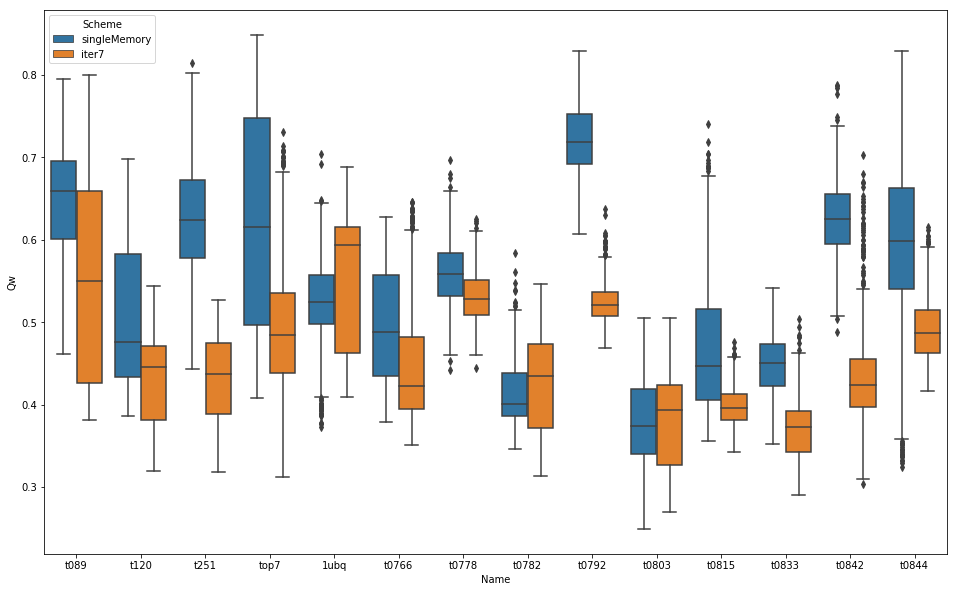

In [35]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_iterative_optimization_test_03-29.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/iter7_2_iterative_optimization_test_03-29.csv", index_col=0)
d = pd.concat([
                data.assign(Scheme="singleMemory"), 
                   
                 data2.assign(Scheme="iter7"), 

              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


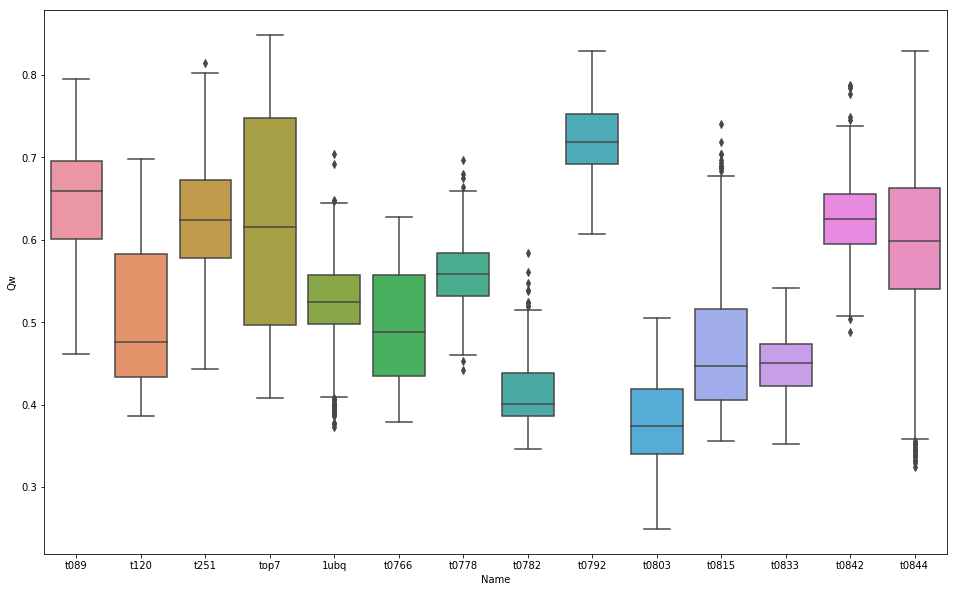

In [33]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_test"
pre = pre + folder + "/"
simulationType = "single"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

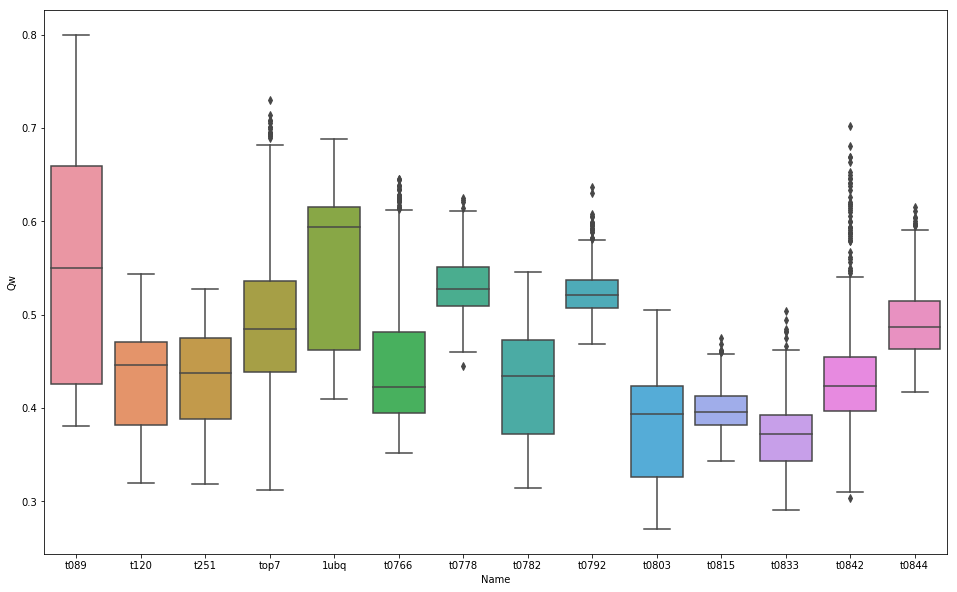

In [34]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_test"
pre = pre + folder + "/"
simulationType = "iter7_2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=10, formatName=False)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)